In [13]:
import numpy as np
import matplotlib.pyplot as plt

#### [연습문제 3-1]

- 두 벡터를 입력으로 받아 두 개의 수(피어슨 상관계수, 코사인 유사도)를 출력하는 파이썬 함수 작성
- np.corrcoef와 spatial.distance.cosine을 호출하지 않고 책에 나와있는 공식을 따라서 코드 작성
- 변수들이 이미 평균중심화되어 있다면 두 출력 결과가 동일하고 그렇지 않다면 결과가 서로 다른지 확인

In [10]:
def pearsonAndCosine(v1,v2):
  v1_mean = np.mean(v1)
  v2_mean = np.mean(v2)

  v1_mc = v1 - v1_mean
  v2_mc = v2 - v2_mean 

  pearson = np.dot(v1_mc, v2_mc) / (np.linalg.norm(v1_mc) * np.linalg.norm(v2_mc))

  cosine = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

  return pearson, cosine


# 두 벡터 입력 받기
v1 = np.array(list(map(int, input().split())))
v2 = np.array(list(map(int, input().split())))
print(pearsonAndCosine(v1,v2))



(-0.9999999999999998, 0.7627290435035147)


#### [연습문제 3-2]

- 0에서 3까지의 정수를 가진 변수와 이 변수에 특정 오프셋을 더한 두 번째 변수를 만들기
- 시스템적으로 오프셋을 -50부터 +50까지 변경하는 시뮬레이션
- 즉, 시뮬레이션의 첫 번째 반복에서는 두 번째 변수가 [-50, -49, -48, -47]이 됨
- for 루프에서 두 변수 간의 상관관계와 코사인 유사도를 계산하고 결과를 저장
- 평균 오프셋이 상관관계와 코사인 유사성에 어떻게 영향을 주는지 보여 주는 선 그래프를 그리기

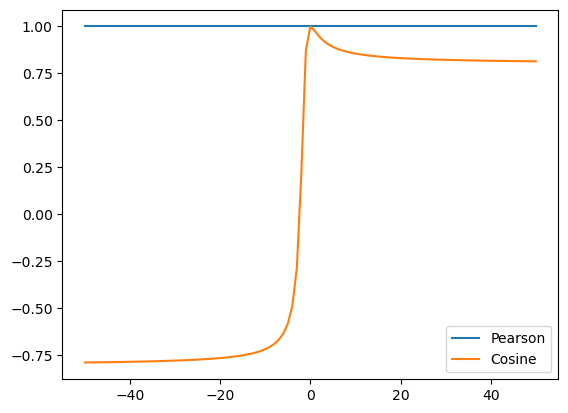

In [14]:
v1 = np.array([0, 1, 2, 3])
offset = -50
results = []
for offset in range(-50, 51):
    v2 = v1 + offset
    # 피어슨 상관계수와 코사인 유사도를 계산하고 결과를 저장
    pearson, cosine = pearsonAndCosine(v1, v2)
    results.append((offset, pearson, cosine))

# 결과 시각화
results = np.array(results)
plt.plot(results[:,0], results[:,1], label='Pearson')
plt.plot(results[:,0], results[:,2], label='Cosine')
plt.legend()
plt.show()

 

#### [연습문제 3-5]

- 에지 검출기 만들기
- 에지 검출기의 커널은 [-1 +1]
- 일정한 시계열 신호 조각(예를 들어 [10 10])과 커널의 내적은 0
- 그러나 신호가 급격히 변화하면 내적이 커진다. (예를 들어 [1 10]과의 내적은 9)
- 첫 번째 단계는 이 두 시계열을 생성하는 코드를 구현하는 것
- 다음으로 신호의 시점에 대해 for 루프 작성
- 각 시점에서 커널과 길이가 같은 시계열 데이터 조각과 커널 사이의 내적을 계산
- 에지 검출기는 신호가 평평할 때 0, 신호가 상승할 때 +1, 신호가 하강할 때 -1을 반환
- (추가) 커널을 [0 -1 1 0]으로 바꾸면? 커널을 [-1 1]로 뒤집으면? 커널이 비대칭([-1 2])이라면?

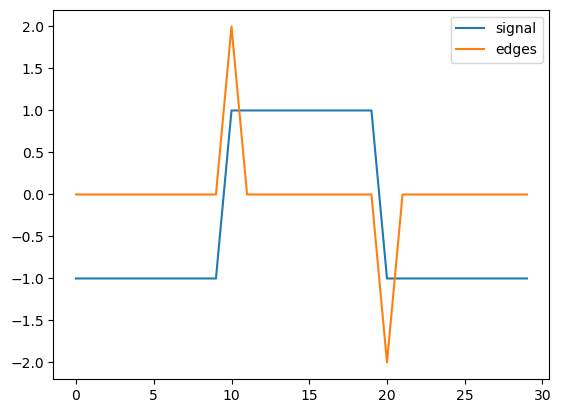

In [17]:
# 에지 검출기의 커널은 [-1 +1]
kernel = np.array([-1, 1])

# 시계열 신호
signal = np.zeros(30)
signal[:10] = -1
signal[10:20] = 1
signal[20:] = -1

# 각 시점에서 커널과 길이가 같은 시계열 데이터 조각과 커널 사이의 내적 계산
# 신호가 평평할 때 0, 신호가 상승할 때 +1, 신호가 하강할 때 -1
edges = np.zeros(30)
for i in range(30):
    if i < 1 or i > 28:
        edges[i] = 0
    else:
        edges[i] = np.dot(signal[i-1:i+1], kernel)

# 결과 시각화
plt.plot(signal, label='signal')
plt.plot(edges, label='edges')
plt.legend()
plt.show()

오잉 왜 +2 -2를 반환하지